# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Для начала, проверим получившийся датафрейм
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Для этой задачи имеет смысл сравнивать столбцы children - собственно, количество детей, и debt - задолженость по другим кредитам.

Условно debt можно поделить на 2 категории - человек имеет, или не имеет задолженостей, debt либо равен нулю, либо не равен.

In [23]:
# Ненулевой долг
debt_not_zero = data[data['debt'] != 0]
# Нулевой долг
debt_zero = data[data['debt'] == 0]

In [24]:
# Теперь просмотрим информацию о получившихся датафреймах
debt_not_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 14 to 21523
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               1732 non-null   int64  
 1   days_employed          1732 non-null   float64
 2   dob_years              1732 non-null   int64  
 3   education              1732 non-null   object 
 4   education_id           1732 non-null   int64  
 5   family_status          1732 non-null   object 
 6   family_status_id       1732 non-null   int64  
 7   gender                 1732 non-null   object 
 8   income_type            1732 non-null   object 
 9   debt                   1732 non-null   int64  
 10  total_income           1732 non-null   int32  
 11  purpose                1732 non-null   object 
 12  total_income_category  1732 non-null   object 
 13  purpose_category       1732 non-null   object 
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 

In [25]:
debt_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19599 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               19599 non-null  int64  
 1   days_employed          19599 non-null  float64
 2   dob_years              19599 non-null  int64  
 3   education              19599 non-null  object 
 4   education_id           19599 non-null  int64  
 5   family_status          19599 non-null  object 
 6   family_status_id       19599 non-null  int64  
 7   gender                 19599 non-null  object 
 8   income_type            19599 non-null  object 
 9   debt                   19599 non-null  int64  
 10  total_income           19599 non-null  int32  
 11  purpose                19599 non-null  object 
 12  total_income_category  19599 non-null  object 
 13  purpose_category       19599 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 

В таблице значительно меньше должников, чем людей с хорошей кредитной историей, исходя из размеров таблиц. Изначально столбец debt не имел пустых значений, значит данные не подвержены статистическим отклонениям, если предполагать, что выборка случайная.

Теперь рассмотрим статистику по детям в этих 2 таблицах.

In [26]:
debt_not_zero['children'].describe()

count    1732.000000
mean        0.536374
std         0.770899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: children, dtype: float64

In [27]:
debt_zero['children'].describe()

count    19599.000000
mean         0.468493
std          0.750490
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

Для удобства построим Гистограммы по количеству детей для обоих категорий

In [28]:
# Импорт библиотеки визуализации
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

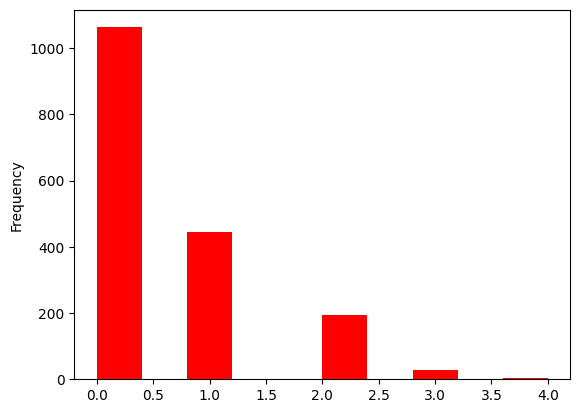

In [29]:
debt_not_zero['children'].plot(kind='hist', color='red')

<Axes: ylabel='Frequency'>

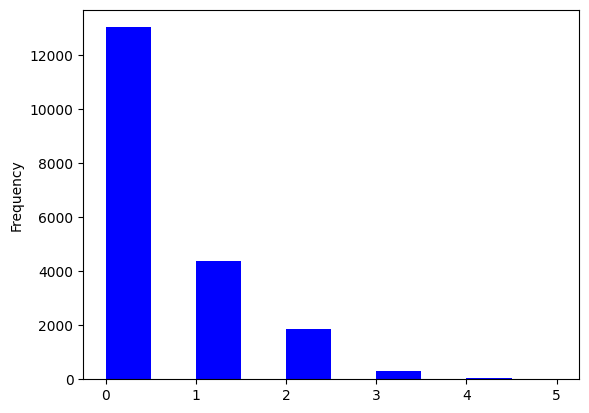

In [30]:
debt_zero['children'].plot(kind='hist', color='blue')

Среднее число детей незначительно меньше у людей без задолженостей, остальные статистические показатели также отличаются незначительно. Максимальное число детей больше у людей без долга, но это происходит из-за того что сама выборка намного больше. 

Стандартное квадратичное отклонение также показывает что распределения имеют примерно одно и то же поведение.

Визуально графики распределения детей в обоих случаях одинаковы

Составим также сводную таблицу на основе полученных данных.

In [31]:
# Для составления сводной таблицы проще всего работать с одним датафреймом, поэтому добавим признак в основной - есть ли у заёмщика долги по кредитам
def has_debt(value):
    if value != 0:
        return True
    return False

data['has_debt'] = data['debt'].apply(has_debt)

In [32]:
# Также добавлю новые категории для количества детей
def children_category(value):
    if value == 0:
        return 'Нет детей'
    elif value == 1:
        return '1 ребёнок'
    return '2 и больше детей'

data['children_category'] = data['children'].apply(children_category)

In [33]:
# Формирование сводной таблицы
children_pivot = data.pivot_table(index=['children_category'], values='has_debt', aggfunc=('sum', 'count'))
children_pivot['Процент задерживающих выплаты'] = children_pivot['sum'] / children_pivot['count'] * 100
children_pivot = children_pivot.drop(columns='sum')
# Переименование столбцов
children_pivot = children_pivot.rename(columns={'count':'Всего людей в категории'})
children_pivot = children_pivot.rename_axis(index='Число детей')
children_pivot

,Всего людей в категории,Процент задерживающих выплаты
Число детей,,
1 ребёнок,4808,9.234609
2 и больше детей,2432,9.251645
Нет детей,14091,7.543822


Анализ сводной таблицы показывает уже иную картину.

Видно, что чаще всего кредит возвращают люди, не имеющие детей. Для анализа категорий 3-5 детей недостаточно данных, поэтому они были объеденены в категорию '2 и больше детей'. Можно сказать, что не *количество*, а *наличие* детей влияет на возврат кредита в срок.

**Вывод:** *Наличие* детей *влияет* на задолжености по другим кредитам. Гипотеза была подтверждена, но её пришлось переформулировать.

Это может быть связано с дополнительными тратами на детей, из-за чего падает общая платёжеспособность.

P.S. Жаль конечно что сейчас в России такая демографическая ситуация, что сумма всех людей с детьми намного меньше чем количество людей без детей, да и в среднем приходится 0.5 детей на платёжеспособного человека (Только платёжеспособные берут кредиты, потому и такое наблюдение)

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Поскольку семейное положение является качественным, а не количественным параметром, нужно считать число обоих категорий, и рассматривать, как они представлены по категориям. Я буду анализировать по столбцу family_status, для более понятного промежуточного результата в ходе исследования

In [34]:
# Для начала, нужно понять, сколько каждого из значений есть в датафреймах
family_counts_with_debt = debt_not_zero['family_status'].value_counts()
family_counts_with_debt

family_status
женат / замужем          927
гражданский брак         385
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
Name: count, dtype: int64

In [35]:
family_counts_without_debt = debt_zero['family_status'].value_counts()
family_counts_without_debt

family_status
женат / замужем          11334
гражданский брак          3749
Не женат / не замужем     2523
в разводе                 1105
вдовец / вдова             888
Name: count, dtype: int64

Из простого анализа цифр мало что можно понять, можно попробовать разделить попарно количество значений каждой категории между датафреймами

In [36]:
family_counts_ratio = family_counts_with_debt / family_counts_without_debt
family_counts_ratio

family_status
женат / замужем          0.081789
гражданский брак         0.102694
Не женат / не замужем    0.108205
в разводе                0.076018
вдовец / вдова           0.070946
Name: count, dtype: float64

Чем выше значение в данном случае, тем выше вероятность, что человек является должником. При анализе можно увидеть, что если человек состоит в гражданском браке, или не разу не был замужем/женат, то выше вероятность того что он не вернёт кредит. Для подтверждения можно построить ещё один график по отношению должников к недолжникам при разных семейных статусах.

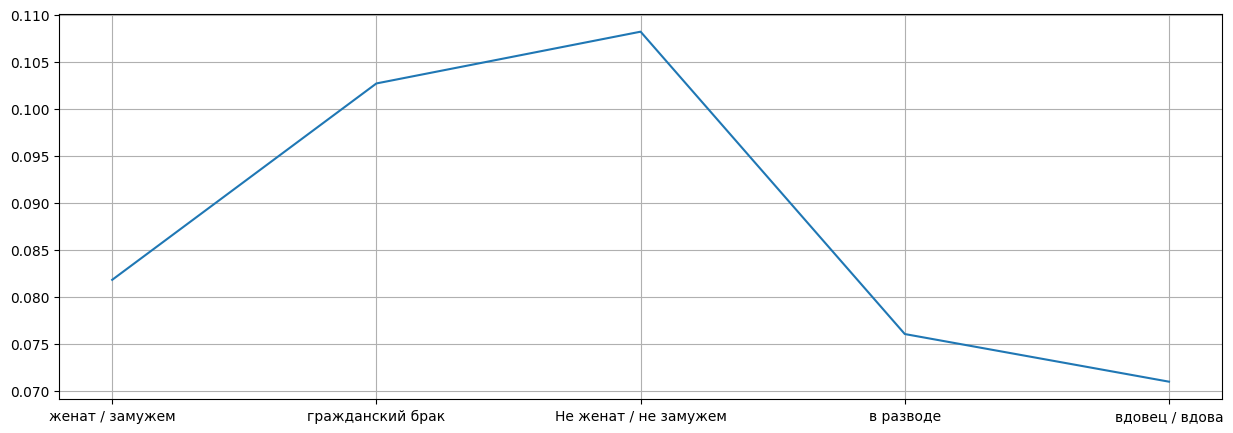

In [37]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(family_counts_ratio.index, family_counts_ratio.values)

Из графика также заметно что семейный статус сильно влияет на вероятность невыплаты долга

Также отразим это в сводной таблице

In [38]:
# Преобразуем имеющийся сериес к датафрейму, и дополним
family_status_pivot = family_counts_ratio.to_frame()
# Переход от доли к процентам в следующей строке
family_status_pivot *= 100
family_status_pivot['Всего людей в категории'] = data['family_status'].value_counts()
# Переименуем столбцы
family_status_pivot = family_status_pivot.rename(columns={'count':'Процент задерживающих выплаты'})
family_status_pivot = family_status_pivot.rename_axis(index='Семейный статус')
# Изменение порядка столбцов для единообразия таблиц
family_status_pivot = family_status_pivot[['Всего людей в категории', 'Процент задерживающих выплаты']]
family_status_pivot

,Всего людей в категории,Процент задерживающих выплаты
Семейный статус,,
женат / замужем,12261,8.178931
гражданский брак,4134,10.269405
Не женат / не замужем,2796,10.820452
в разводе,1189,7.601810
вдовец / вдова,951,7.094595


Сводная таблица показывает те же результаты

**Вывод:** Семейный статус *влияет* на возврат кредита. Чаще кредит полностью выплачивают те кто состоял/состоит в оформленном браке, чем те, кто никогда в нём не был. 

Возможно, это происходит потому что люди начинают относиться к планированию бюджета более основательно, когда от денег зависит не только жизнь самого человека, но и его семьи.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Поскольку уровни дохода индивидуальные для каждого человека, не получится его банально рассчитать только с помощью статистических данных, как в случае с числом детей, нужно и разбиение по категориям. Но при этом у нас уже есть классификация доходов - столбец total_income_category. Его и будем использовать для анализа.

In [39]:
# Посчитаем категории также как и в случае с семейным статусом
income_counts_with_debt = debt_not_zero['total_income_category'].value_counts()
income_counts_with_debt

total_income_category
C    1353
B     354
D      21
E       2
A       2
Name: count, dtype: int64

In [40]:
income_counts_without_debt = debt_zero['total_income_category'].value_counts()
income_counts_without_debt

total_income_category
C    14568
B     4660
D      328
A       23
E       20
Name: count, dtype: int64

Всё так же непонятно только из цифр, как влияет доход на выплату долга, поэтому также вычислим отношение одной таблицы к другой

In [41]:
income_counts_ratio = income_counts_with_debt / income_counts_without_debt
income_counts_ratio

total_income_category
A    0.086957
B    0.075966
C    0.092875
D    0.064024
E    0.100000
Name: count, dtype: float64

Следует учитывать, что данных для категорий E и A очень мало - всего 22 и 25 вхождений соответственно, поэтому анализировать их стоит осторожно. По категориям B, C и D можно увидеть, что чаще всего долг не возвращают люди из категории C, и чаще его выплачивают люди из категорий B и D. Построим графики по всем категориям и по категориям с множеством значений.

In [42]:
# Дополнительный Series для меньшего количества групп
shrinked_income_counts_ratio = income_counts_ratio.loc[['B', 'C', 'D']]

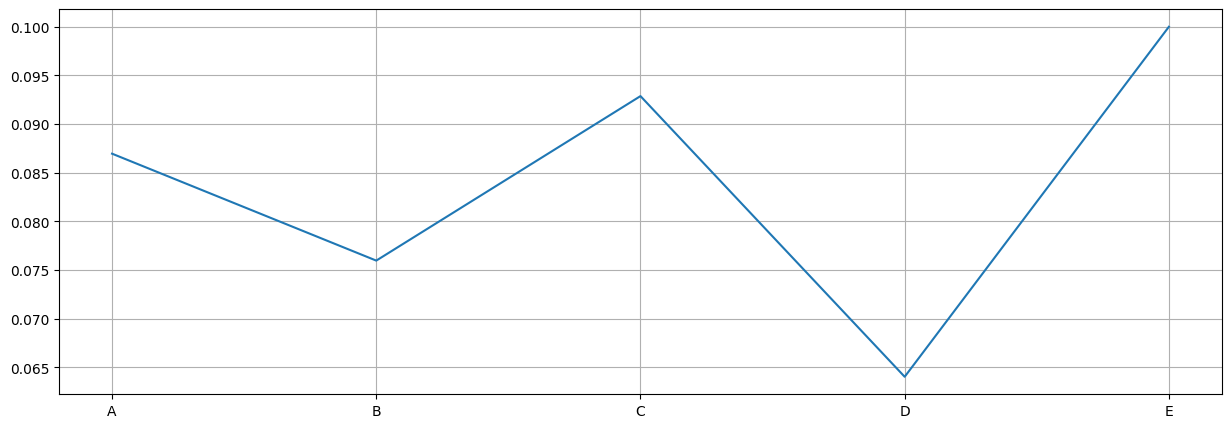

In [43]:
# График по всем группам
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(income_counts_ratio.index, income_counts_ratio.values)

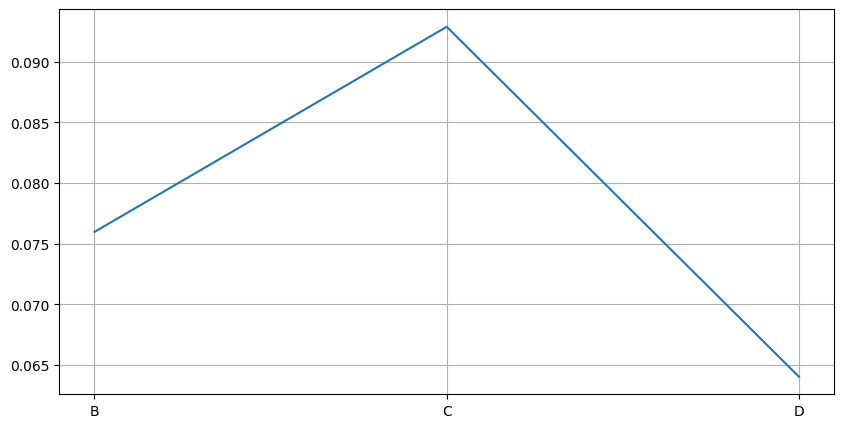

In [44]:
# График по группам с >100 вхождениями
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(shrinked_income_counts_ratio.index, shrinked_income_counts_ratio.values)

Графики также подтверждают наблюдения

Также оформим сводную таблицу по наблюдениям

In [45]:
# Используем тот же способ что и в прошлый раз, для создания таблицы из сериес
income_pivot = income_counts_ratio.to_frame()
# Переход от доли к процентам в следующей строке
income_pivot *= 100
income_pivot['Всего людей в категории'] = data['total_income_category'].value_counts()
# Переименуем столбцы
income_pivot = income_pivot.rename(columns={'count':'Процент задерживающих выплаты'})
income_pivot = income_pivot.rename_axis(index='Категория доходов')
# Изменение порядка столбцов для единообразия таблиц
income_pivot = income_pivot[['Всего людей в категории', 'Процент задерживающих выплаты']]
income_pivot

,Всего людей в категории,Процент задерживающих выплаты
Категория доходов,,
A,25,8.695652
B,5014,7.596567
C,15921,9.287479
D,349,6.402439
E,22,10.000000


Сводная таблица даёт те же результаты.

**Вывод:** Уровень дохода *влияет* на вероятность выплаты долга. Недостаточно данных для анализа по категориям A и E, поэтому выводы были сделаны по остальным категориям. Чаще всего возвращают кредит люди из категории D, затем B, затем C. На результат исследования также могло повлиять заполнение пустых данных медианными значениями, которые соответствуют категории C, но несущественно - дозаполненные значения составляют около 14% от всех людей в категории.

Скорее всего это происходит из-за разницы в сумме занимаемых денег. Люди из категории D склонны брать малые кредиты, чтобы вернуть его как можно быстрее, в то время как люди из категорий B и C берут большие кредиты, но люди из категории C зачастую неспособны их выплатить, что и порождает такую статистику.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Цели кредита находятся в столбце purpose_category, и там же они уже разделёны на категории, поэтому можно проводить анализ данных.

In [46]:
# Проведём тот же анализ в 3-й раз
purpose_counts_with_debt = debt_not_zero['purpose_category'].value_counts()
purpose_counts_with_debt

purpose_category
операции с недвижимостью    780
операции с автомобилем      400
получение образования       369
проведение свадьбы          183
Name: count, dtype: int64

In [47]:
purpose_counts_without_debt = debt_zero['purpose_category'].value_counts()
purpose_counts_without_debt

purpose_category
операции с недвижимостью    9971
операции с автомобилем      3879
получение образования       3619
проведение свадьбы          2130
Name: count, dtype: int64

In [48]:
# Так же поделим должников на недолжников
purpose_counts_ratio = purpose_counts_with_debt / purpose_counts_without_debt
purpose_counts_ratio

purpose_category
операции с недвижимостью    0.078227
операции с автомобилем      0.103119
получение образования       0.101962
проведение свадьбы          0.085915
Name: count, dtype: float64

Данных для анализа каждой категории достаточно. Чаще всего люди не могут вернуть долг в случае заёма с целью приобритения автомобиля или оплаты образования. Кредиты для жилья или проведения свадьбы люди склонны отдавать в полной мере.

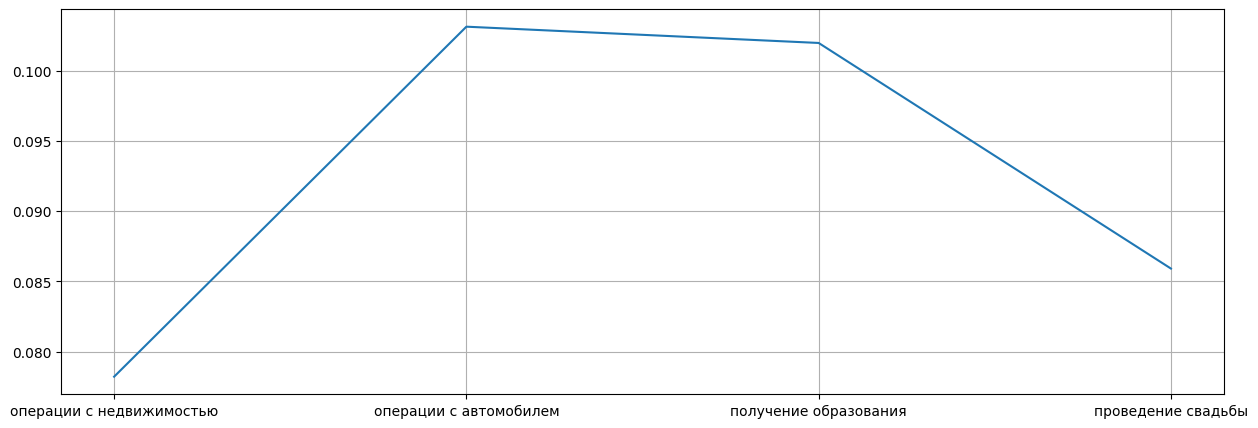

In [49]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(purpose_counts_ratio.index, purpose_counts_ratio.values)

График по отношениям подтверждает наблюдения.

Также оформим сводную таблицу по наблюдениям

In [50]:
# Используем тот же способ что и в прошлые 2 раза, для создания таблицы из сериес
purpose_pivot = purpose_counts_ratio.to_frame()
# Переход от доли к процентам в следующей строке
purpose_pivot *= 100
purpose_pivot['Всего людей в категории'] = data['purpose_category'].value_counts()
# Переименуем столбцы
purpose_pivot = purpose_pivot.rename(columns={'count':'Процент задерживающих выплаты'})
purpose_pivot = purpose_pivot.rename_axis(index='С какой целью взят кредит')
# Изменение порядка столбцов для единообразия таблиц
purpose_pivot = purpose_pivot[['Всего людей в категории', 'Процент задерживающих выплаты']]
purpose_pivot

,Всего людей в категории,Процент задерживающих выплаты
С какой целью взят кредит,,
операции с недвижимостью,10751,7.822686
операции с автомобилем,4279,10.311936
получение образования,3988,10.196187
проведение свадьбы,2313,8.591549


Сводная таблица даёт те же результаты.

**Вывод:** Причина для взятия кредита *влияет* на вероятность выплаты долга. Кредит склонны возвращать те, кто взял его с целью проведения свадьбы, или покупки недвижимости. Люди, берущие кредит для покупки машины, или получения образования склонны задерживать плату.

Думаю, что это коррелирует с семейным положением заёмщика. Образование чаще получают неженатые/незамужние, в то время как покупка автомобиля - предел мечтаний многих молодых людей. Проведение свадьбы и покупка недвижимости - более зрелый поступок, который требует основательного планирования будущего, из чего и такой вывод.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Изначально имеющие пустые данные столбцы - days_employed и total_income. Разберём их по отдельности.
* days_employed - Количество дней, которые человек проработал. Исходя из начальных данных таблицы, имеет смешанный формат внесения данных - число может быть отрицательным, положительным, или вовсе огромным настолько, что его сложно принимать как адекватный источник данных. Скорее всего этот столбец собирался из разных таблиц, в которых формат заполнения отличается от других, и в одной таблице попросту отсутствовал этот параметр.

* Исходя из прошлого вывода, поскольку total_income отсутствовал в том же числе строк что и days_employed - 2174, можно вывести что они связаны напрямую. total_income также отсутствовал в источнике, из которого были взяты строки.

* Также возможно что данные были некоректно перенесены из другой таблицы, и попросту были утеряны.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение не так значительно влияет на ход исследования. В данном случае восстановленные значения total_income составляли около 14-15% от группы C, и по большей мере не повлияло на результат этой группы. Медиана также устойчива к выбросам в отличии от среднего значения, которое в этом случае могло дополнить категорию B, вместо категории C, и сильно исказило бы результат.

Медианное значение добавляет в среднюю группу признака новые значения, но поскольку их доля не становится значительной, к какой бы группе они до этого не относились - это не сильно повлияет на результат, но непропущенные значения из других столбцов могут сыграть важную роль при проверке других гипотез.

### Шаг 4: Общий вывод.

В ходе исследования были проверены 4 различные гипотезы:

* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Есть ли зависимость между целями кредита и возвратом кредита в срок?

Все гипотезы подтвердились, но одну пришлось переформулировать.

Есть ли зависимость между *количеством* детей и возвратом кредита в срок? -> Есть ли зависимость между *наличием* детей и возвратом кредита в срок?

Чаще всего кредит возвращают в срок лица, относящиеся к следующим категориям:

* Люди, не имеющие детей.
* Люди которые были/находятся в браке.
* Люди с не средним уровнем дохода - ниже или выше среднего.
* Люди, берущие кредит с целью покупки недвижимости, или оплаты свадьбы.

В то же время люди задерживающие выплату по кредиту чаще относятся к следующим категориям:

* Люди, у которых есть дети.
* Люди вне брака/в гражданском браке.
* Люди со средним доходом.
* Люди, берущие кредит с целью покупки машины или оплаты учёбы.

Следует учитывать именно совокупность факторов, поскольку различия внутри одного фактора не играют решающую роль - разница в выплатах кредита в срок состовляет от 20 до 40% между благоприятным и неблагоприятным фактором.